<a href="https://colab.research.google.com/github/MithilaCoomaraswamy/DSGP/blob/Period-Tracker/PeriodTrackerARIMA_V_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PeriodData.csv')
np.random.seed(0)

Mounted at /content/drive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665 entries, 0 to 1664
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1665 non-null   object
 1   CycleNumber                 1665 non-null   int64 
 2   Group                       1665 non-null   int64 
 3   CycleWithPeakorNot          1665 non-null   int64 
 4   ReproductiveCategory        1665 non-null   int64 
 5   LengthofCycle               1665 non-null   int64 
 6   MeanCycleLength             1665 non-null   object
 7   EstimatedDayofOvulation     1665 non-null   object
 8   LengthofLutealPhase         1665 non-null   object
 9   FirstDayofHigh              1665 non-null   object
 10  TotalNumberofHighDays       1665 non-null   object
 11  TotalHighPostPeak           1665 non-null   object
 12  TotalNumberofPeakDays       1665 non-null   object
 13  TotalDaysofFertility        1665 non-null   obje

In [4]:
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,


In [5]:
columns = df.columns
print(columns)

Index(['ClientID', 'CycleNumber', 'Group', 'CycleWithPeakorNot',
       'ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding

In [6]:
df = df[['ClientID', 'CycleNumber', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofMenses',
       'MeanMensesLength']]

In [7]:
df.head()

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17,12,5,4.49
1,nfp8122,2,27,,15,12,5,
2,nfp8122,3,29,,15,14,5,
3,nfp8122,4,27,,15,12,5,
4,nfp8122,5,28,,16,12,5,


In [8]:
df['MeanCycleLength'] = df.groupby('ClientID')['MeanCycleLength'].transform('first')
df['MeanMensesLength'] = df.groupby('ClientID')['MeanMensesLength'].transform('first')

In [9]:
df.head()

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17,12,5,4.49
1,nfp8122,2,27,27.33,15,12,5,4.49
2,nfp8122,3,29,27.33,15,14,5,4.49
3,nfp8122,4,27,27.33,15,12,5,4.49
4,nfp8122,5,28,27.33,16,12,5,4.49


In [10]:
df =df.replace(' ', np.nan)

In [11]:
df.infer_objects(copy=False)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17,12,5,4.49
1,nfp8122,2,27,27.33,15,12,5,4.49
2,nfp8122,3,29,27.33,15,14,5,4.49
3,nfp8122,4,27,27.33,15,12,5,4.49
4,nfp8122,5,28,27.33,16,12,5,4.49
...,...,...,...,...,...,...,...,...
1660,nfp8334,7,29,29.63,19,10,8,NaN
1661,nfp8334,8,28,29.63,17,11,6,NaN
1662,nfp8334,9,28,29.63,16,12,5,NaN
1663,nfp8334,10,40,29.63,27,13,6,NaN


In [12]:
df.infer_objects(copy=False)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17,12,5,4.49
1,nfp8122,2,27,27.33,15,12,5,4.49
2,nfp8122,3,29,27.33,15,14,5,4.49
3,nfp8122,4,27,27.33,15,12,5,4.49
4,nfp8122,5,28,27.33,16,12,5,4.49
...,...,...,...,...,...,...,...,...
1660,nfp8334,7,29,29.63,19,10,8,NaN
1661,nfp8334,8,28,29.63,17,11,6,NaN
1662,nfp8334,9,28,29.63,16,12,5,NaN
1663,nfp8334,10,40,29.63,27,13,6,NaN


In [13]:
columns_to_convert = ['MeanCycleLength', 'EstimatedDayofOvulation',	'LengthofLutealPhase',	'LengthofMenses',	'MeanMensesLength']
for col in columns_to_convert:
               df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

ClientID                     0
CycleNumber                  0
LengthofCycle                0
MeanCycleLength            256
EstimatedDayofOvulation    150
LengthofLutealPhase        151
LengthofMenses               4
MeanMensesLength           268
dtype: int64


In [15]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
display(df)

,ClientID,CycleNumber,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,LengthofMenses,MeanMensesLength
0,nfp8122,1,29,27.33,17.0,12.0,5.0,4.49
1,nfp8122,2,27,27.33,15.0,12.0,5.0,4.49
2,nfp8122,3,29,27.33,15.0,14.0,5.0,4.49
3,nfp8122,4,27,27.33,15.0,12.0,5.0,4.49
4,nfp8122,5,28,27.33,16.0,12.0,5.0,4.49
5,nfp8122,6,26,27.33,15.0,11.0,5.0,4.49
6,nfp8122,7,29,27.33,16.0,13.0,5.0,4.49
7,nfp8122,8,24,27.33,14.0,10.0,4.0,4.49
8,nfp8122,9,28,27.33,16.0,12.0,6.0,4.49
9,nfp8122,10,28,27.33,17.0,11.0,5.0,4.49


In [16]:
def fill_missing_menses_length(df):
    # Group by ClientID to process each unique ClientID
    for client_id, group in df.groupby('ClientID'):
        # If 'MeanMensesLength' is missing (NaN), calculate the mean of 'LengthofMenses'
        if group['MeanMensesLength'].isnull().any():
            mean_menses_length = group['LengthofMenses'].mean()

            # Fill missing MeanMensesLength with the calculated mean
            df.loc[df['ClientID'] == client_id, 'MeanMensesLength'] = df.loc[df['ClientID'] == client_id, 'MeanMensesLength'].fillna(mean_menses_length)

    return df

In [17]:
df = fill_missing_menses_length(df)

In [18]:
def fill_missing_cycle_length(df):
    # Group by ClientID to process each unique ClientID
    for client_id, group in df.groupby('ClientID'):
        # If 'MeanCycleLength' is missing (NaN), calculate the mean of 'LengthofCycle'
        if group['MeanCycleLength'].isnull().any():
            mean_cycle_length = group['LengthofCycle'].mean()

            # Fill missing MeanCycleLength with the calculated mean
            df.loc[df['ClientID'] == client_id, 'MeanCycleLength'] = df.loc[df['ClientID'] == client_id, 'MeanCycleLength'].fillna(mean_cycle_length)

    return df

In [19]:
df = fill_missing_cycle_length(df)

In [20]:
def fill_missing_luteal_phase(df):
    # Loop through each unique ClientID and calculate mean Luteal Phase length
    for client_id, group in df.groupby('ClientID'):
        # Calculate the mean of the existing Luteal Phase lengths for this ClientID
        mean_luteal_phase = group['LengthofLutealPhase'].mean()

        # If the mean Luteal Phase is not NaN, fill missing values with the mean
        if not pd.isna(mean_luteal_phase):
            df.loc[df['ClientID'] == client_id, 'LengthofLutealPhase'] = df.loc[df['ClientID'] == client_id, 'LengthofLutealPhase'].fillna(mean_luteal_phase)

    return df

In [21]:
df = fill_missing_luteal_phase(df)

In [22]:
def fill_missing_ovulation_day(df):
    # Loop through each unique ClientID and calculate mean Estimated Day of Ovulation
    for client_id, group in df.groupby('ClientID'):
        # Calculate the mean of the existing EstimatedDayofOvulation values for this ClientID
        mean_ovulation_day = group['EstimatedDayofOvulation'].mean()

        # If the mean is not NaN, fill missing values with the mean for the current ClientID
        if not pd.isna(mean_ovulation_day):
            df.loc[df['ClientID'] == client_id, 'EstimatedDayofOvulation'] = df.loc[df['ClientID'] == client_id, 'EstimatedDayofOvulation'].fillna(mean_ovulation_day)

    return df

In [23]:
df = fill_missing_ovulation_day(df)

In [24]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

ClientID                   0
CycleNumber                0
LengthofCycle              0
MeanCycleLength            0
EstimatedDayofOvulation    3
LengthofLutealPhase        3
LengthofMenses             4
MeanMensesLength           0
dtype: int64


In [25]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)

     ClientID  CycleNumber  LengthofCycle  MeanCycleLength  \
406   nfp8085            1             48            40.00   
407   nfp8085            2             32            40.00   
1047  nfp8226            1             24            24.00   
1107  nfp8237           18             25            25.85   
1298  nfp8276           10             27            26.58   
1340  nfp8282           14             29            32.07   
1664  nfp8334           11             24            29.63   

      EstimatedDayofOvulation  LengthofLutealPhase  LengthofMenses  \
406                       NaN                  NaN             6.0   
407                       NaN                  NaN             5.0   
1047                      NaN                  NaN             4.0   
1107                16.000000                  9.0             NaN   
1298                17.000000                 10.0             NaN   
1340                20.615385                 12.0             NaN   
1664         

In [26]:
df = df[df['ClientID'] != 'nfp8085']

In [27]:
df = df[df['ClientID'] != 'nfp8226' ]

In [28]:
df.loc[:, 'LengthofLutealPhase'] = df.groupby('ClientID')['LengthofLutealPhase'].transform(lambda x: x.fillna(x.mean()))
df.loc[:, 'LengthofMenses'] = df.groupby('ClientID')['LengthofMenses'].transform(lambda x: x.fillna(x.mean()))

In [29]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
print(rows_with_missing_values)

Empty DataFrame
Columns: [ClientID, CycleNumber, LengthofCycle, MeanCycleLength, EstimatedDayofOvulation, LengthofLutealPhase, LengthofMenses, MeanMensesLength]
Index: []


In [30]:
# Check for duplicate rows.
print(f"There are {df.duplicated().sum()} duplicate rows in the data set.")

# Remove duplicate rows.
df=df.drop_duplicates()
print("The duplicate rows were removed.")

There are 14 duplicate rows in the data set.
The duplicate rows were removed.


In [31]:
df = df.drop(columns=['ClientID'])

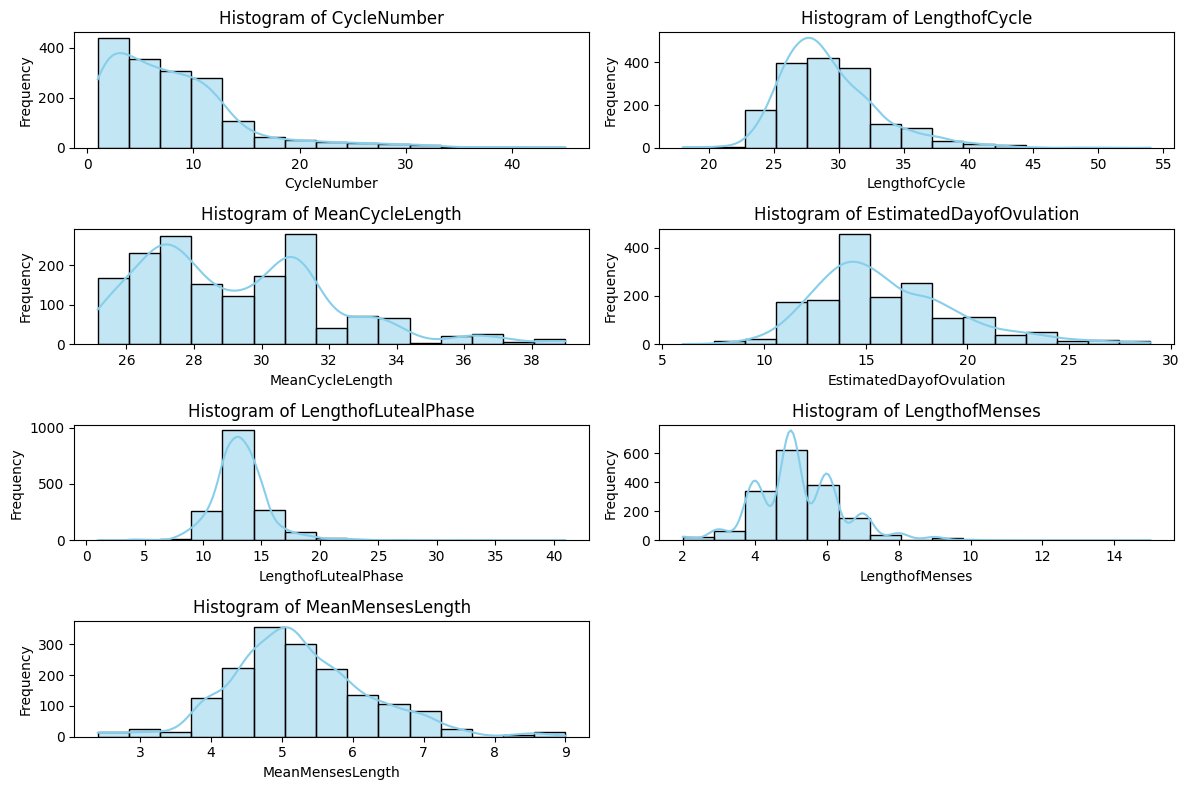

In [32]:
# Plot histograms
columns_to_plot = ['CycleNumber', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofMenses',
       'MeanMensesLength']

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column], bins=15, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

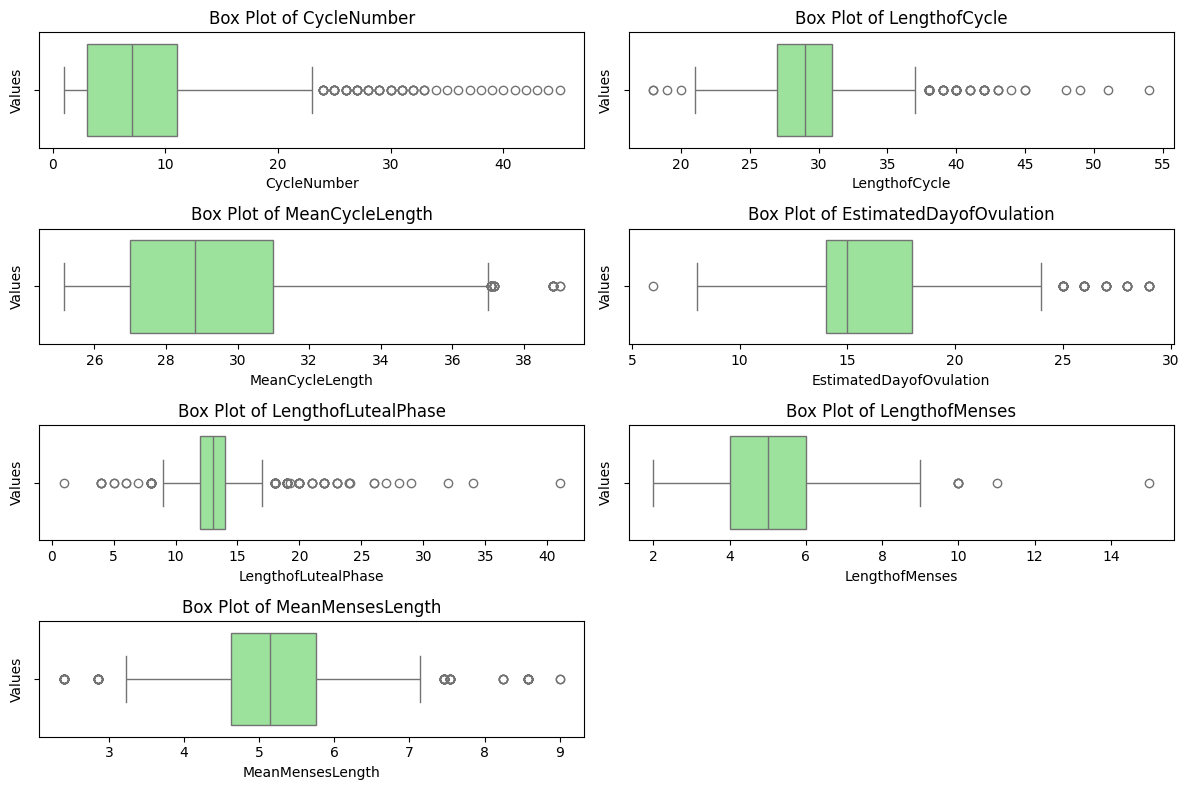

In [33]:
# Draw box plots to check for outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)  # 2 rows, 2 columns
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')

plt.tight_layout()

plt.show()

In [34]:
X = df.drop(columns=['EstimatedDayofOvulation'])  # All columns except 'y'
y = df['EstimatedDayofOvulation']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ADF Statistic: -9.139202012222933
p-value: 2.8799076752412407e-15
ADF Statistic (Differenced): -16.07499747824042
p-value (Differenced): 5.455294851397892e-29


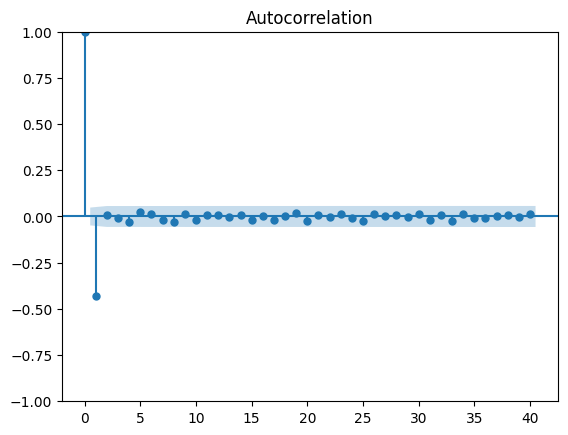

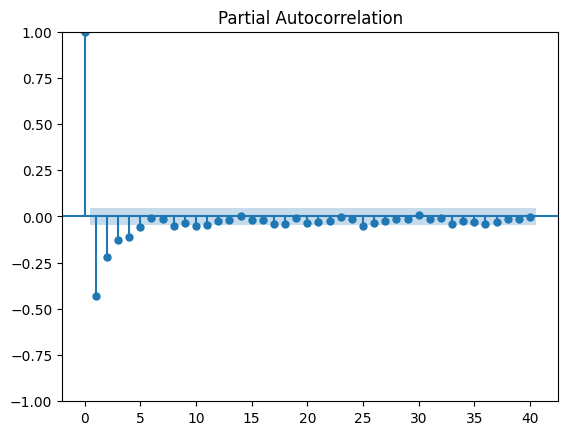

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                  
Dep. Variable:     EstimatedDayofOvulation   No. Observations:                 1648
Model:                      ARIMA(1, 1, 1)   Log Likelihood               -3987.578
Date:                     Sun, 19 Jan 2025   AIC                           7981.156
Time:                             15:08:04   BIC                           7997.376
Sample:                                  0   HQIC                          7987.170
                                    - 1648                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0506      0.034      1.497      0.134      -0.016       0.117
ma.L1         -0.6310      0.026    -23.987      0.000      -0.683      -0.579
sigma2      

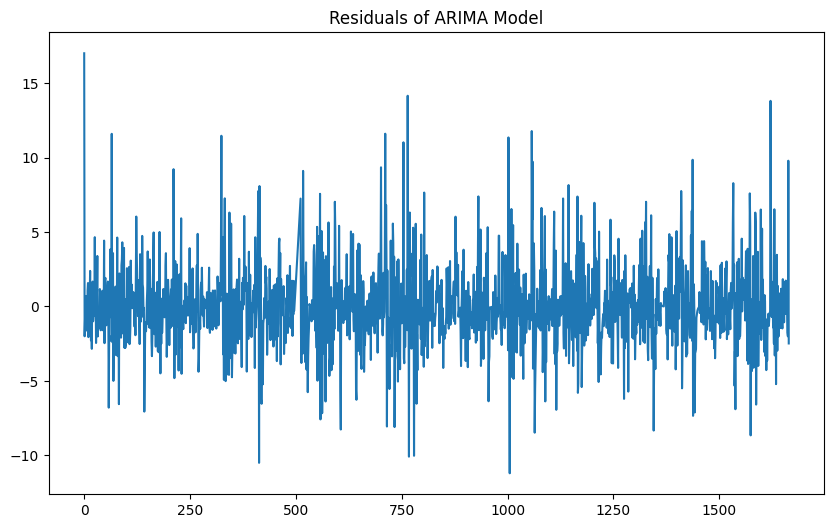

<Figure size 1000x600 with 0 Axes>

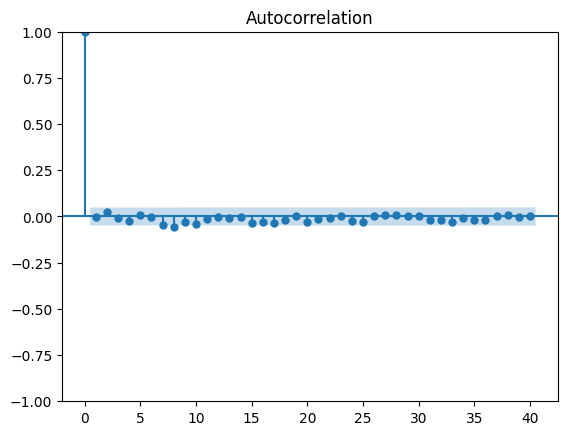

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


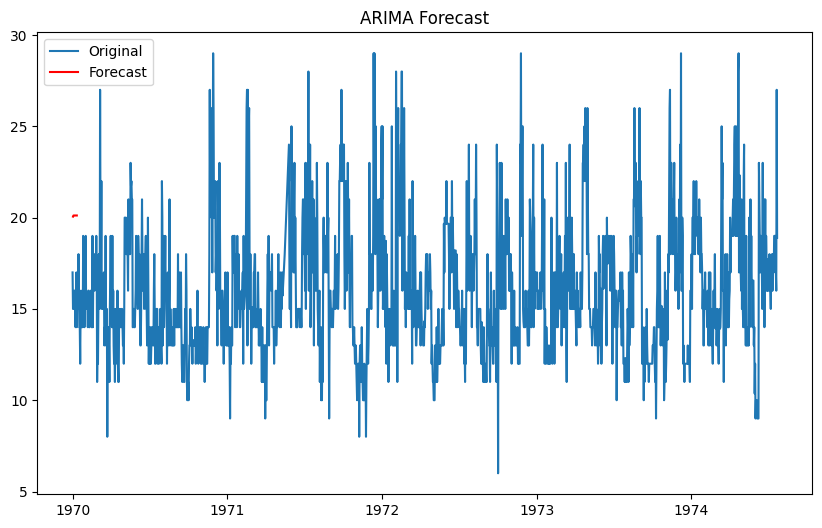

MAE: 4.7917606935686985
RMSE: 5.447774006102379
R-squared: -1.2963537910931144


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [36]:
# Check stationarity of 'EstimatedDayofOvulation' using ADF test
result = adfuller(df['EstimatedDayofOvulation'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Apply differencing to make the series stationary
df['diff'] = df['EstimatedDayofOvulation'].diff()

# Check stationarity again on the differenced series
result = adfuller(df['diff'].dropna())
print(f"ADF Statistic (Differenced): {result[0]}")
print(f"p-value (Differenced): {result[1]}")

# Plot ACF and PACF
plot_acf(df['diff'].dropna(), lags=40)
plot_pacf(df['diff'].dropna(), lags=40)
plt.show()

# ARIMA model fitting (use p=1, d=1, q=1 as an example)
model = ARIMA(df['EstimatedDayofOvulation'], order=(1, 1, 1))  # ARIMA(p,d,q)
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())

# Residual plot
residuals = fitted_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()

# Check if residuals resemble white noise (no pattern)
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=40)
plt.show()

# Forecasting the next 10 periods (steps)
forecast_steps = 10
forecast = fitted_model.forecast(steps=forecast_steps)

# Create forecast index
forecast_index = pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['EstimatedDayofOvulation'], label='Original')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.legend()
plt.title("ARIMA Forecast")
plt.show()

# Evaluation metrics (using last portion of the data as test)
y_pred = fitted_model.forecast(steps=len(df) - len(y_train))  # Assuming y_train is your training set

# Assuming y_test is your true test values (future values)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")